In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and dir

In [1]:
import pandas as pd # 데이터 구성 패키지( series, dataframe )
import numpy as np # 행렬 연산 패키지
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

%matplotlib inline

pd.set_option('display.max_rows',400)
sns.set(rc={'figure.figsize':(10, 5)})

In [2]:
# 한글 폰트
plt.rc('font', family='NanumGothic')

# 음수 표시
plt.rcParams['axes.unicode_minus']=False

# 에러 무시
import warnings
warnings.filterwarnings(action='ignore')

# 컬럼 다 보이게
pd.set_option('display.max_columns',None)
# 행 다 보이게
pd.set_option('display.max_rows',None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_broad = pd.read_csv('/content/drive/MyDrive/Broadcasting.csv',encoding ='utf-8')
df_crew= pd.read_csv('/content/drive/MyDrive/Crew_group.csv',encoding ='utf-8')
df_product =  pd.read_csv('/content/drive/MyDrive/Product.csv',encoding ='utf-8')

In [5]:
df_broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방송Code      26283 non-null  float64
 1   소요분         26283 non-null  float64
 2   가중분         26283 non-null  float64
 3   방송구분        26283 non-null  object 
 4   프로그램명       26283 non-null  object 
 5   상품ID        26283 non-null  int64  
 6   상품명         26283 non-null  object 
 7   매입과세구분      26283 non-null  object 
 8   상품목표취급금액    26283 non-null  int64  
 9   상품목표주문금액    26283 non-null  int64  
 10  상품목표공헌이익금액  26283 non-null  int64  
 11  판매단가        26283 non-null  int64  
 12  수수료율        26283 non-null  float64
 13  상품주문수량      26283 non-null  int64  
 14  상품주문금액      26283 non-null  int64  
 15  상품취소수량      26283 non-null  int64  
 16  상품취소금액      26283 non-null  int64  
 17  상품순주문수량     26283 non-null  int64  
 18  상품순주문금액     26283 non-null  int64  
 19  상품예상취급금액    26283 non-nul

In [6]:
# 요일 추가하기
df_broad['방송시작시간'] = pd.to_datetime(df_broad['방송시작시간'])

# "weekday" 열 추가
df_broad['방송요일'] = df_broad['방송시작시간'].dt.day_name()

# 결과 출력
df_broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      26283 non-null  float64       
 1   소요분         26283 non-null  float64       
 2   가중분         26283 non-null  float64       
 3   방송구분        26283 non-null  object        
 4   프로그램명       26283 non-null  object        
 5   상품ID        26283 non-null  int64         
 6   상품명         26283 non-null  object        
 7   매입과세구분      26283 non-null  object        
 8   상품목표취급금액    26283 non-null  int64         
 9   상품목표주문금액    26283 non-null  int64         
 10  상품목표공헌이익금액  26283 non-null  int64         
 11  판매단가        26283 non-null  int64         
 12  수수료율        26283 non-null  float64       
 13  상품주문수량      26283 non-null  int64         
 14  상품주문금액      26283 non-null  int64         
 15  상품취소수량      26283 non-null  int64         
 16  상품취소금액      26283 non-

In [7]:
df_broad['방송Code'] = df_crew['방송Code']

In [8]:
df_merge=pd.merge(df_broad,df_crew,on='방송Code',how='outer')

In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26283 entries, 0 to 26282
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      26283 non-null  int64         
 1   소요분         26283 non-null  float64       
 2   가중분         26283 non-null  float64       
 3   방송구분_x      26283 non-null  object        
 4   프로그램명_x     26283 non-null  object        
 5   상품ID_x      26283 non-null  int64         
 6   상품명         26283 non-null  object        
 7   매입과세구분      26283 non-null  object        
 8   상품목표취급금액    26283 non-null  int64         
 9   상품목표주문금액    26283 non-null  int64         
 10  상품목표공헌이익금액  26283 non-null  int64         
 11  판매단가        26283 non-null  int64         
 12  수수료율        26283 non-null  float64       
 13  상품주문수량      26283 non-null  int64         
 14  상품주문금액      26283 non-null  int64         
 15  상품취소수량      26283 non-null  int64         
 16  상품취소금액      26283 non-

In [10]:
#필요없는 열 제거
df_merge=df_merge.drop(['방송구분_y','프로그램명_y','상품ID_y','협력사ID'],axis=1)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26283 entries, 0 to 26282
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      26283 non-null  int64         
 1   소요분         26283 non-null  float64       
 2   가중분         26283 non-null  float64       
 3   방송구분_x      26283 non-null  object        
 4   프로그램명_x     26283 non-null  object        
 5   상품ID_x      26283 non-null  int64         
 6   상품명         26283 non-null  object        
 7   매입과세구분      26283 non-null  object        
 8   상품목표취급금액    26283 non-null  int64         
 9   상품목표주문금액    26283 non-null  int64         
 10  상품목표공헌이익금액  26283 non-null  int64         
 11  판매단가        26283 non-null  int64         
 12  수수료율        26283 non-null  float64       
 13  상품주문수량      26283 non-null  int64         
 14  상품주문금액      26283 non-null  int64         
 15  상품취소수량      26283 non-null  int64         
 16  상품취소금액      26283 non-

In [11]:
df_merge.rename(columns = {'상품ID_x' : '상품ID'}, inplace = True)

In [12]:
df_product =df_product.drop_duplicates(subset='상품ID')

In [13]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 0 to 6815
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품ID    6772 non-null   int64 
 1   상품명     6772 non-null   object
 2   브랜드ID   6772 non-null   int64 
 3   브랜드명    6772 non-null   object
 4   매입과세구분  6772 non-null   object
 5   대분류     6772 non-null   object
 6   중분류     6772 non-null   object
 7   소분류     6772 non-null   object
 8   세분류     6772 non-null   object
 9   카테고리    6772 non-null   object
 10  협력사ID   6772 non-null   int64 
 11  협력사명    6772 non-null   object
 12  매입형태    6772 non-null   object
 13  배송방식    6772 non-null   object
 14  판매단가    6772 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 846.5+ KB


In [14]:
df_hab=pd.merge(df_merge,df_product,on=['상품ID'],how='outer')

In [15]:
df_hab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26283 entries, 0 to 26282
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      26283 non-null  int64         
 1   소요분         26283 non-null  float64       
 2   가중분         26283 non-null  float64       
 3   방송구분_x      26283 non-null  object        
 4   프로그램명_x     26283 non-null  object        
 5   상품ID        26283 non-null  int64         
 6   상품명_x       26283 non-null  object        
 7   매입과세구분_x    26283 non-null  object        
 8   상품목표취급금액    26283 non-null  int64         
 9   상품목표주문금액    26283 non-null  int64         
 10  상품목표공헌이익금액  26283 non-null  int64         
 11  판매단가_x      26283 non-null  int64         
 12  수수료율        26283 non-null  float64       
 13  상품주문수량      26283 non-null  int64         
 14  상품주문금액      26283 non-null  int64         
 15  상품취소수량      26283 non-null  int64         
 16  상품취소금액      26283 non-

In [16]:
#필요없는 열 제거
df_hab=df_hab.drop(['상품명_y','매입과세구분_y','협력사명_y','매입형태_y','배송방식_y','판매단가_y','브랜드ID','대분류','소분류','중분류','세분류'],axis=1)
df_hab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26283 entries, 0 to 26282
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      26283 non-null  int64         
 1   소요분         26283 non-null  float64       
 2   가중분         26283 non-null  float64       
 3   방송구분_x      26283 non-null  object        
 4   프로그램명_x     26283 non-null  object        
 5   상품ID        26283 non-null  int64         
 6   상품명_x       26283 non-null  object        
 7   매입과세구분_x    26283 non-null  object        
 8   상품목표취급금액    26283 non-null  int64         
 9   상품목표주문금액    26283 non-null  int64         
 10  상품목표공헌이익금액  26283 non-null  int64         
 11  판매단가_x      26283 non-null  int64         
 12  수수료율        26283 non-null  float64       
 13  상품주문수량      26283 non-null  int64         
 14  상품주문금액      26283 non-null  int64         
 15  상품취소수량      26283 non-null  int64         
 16  상품취소금액      26283 non-

In [17]:
df_hab=df_hab.drop(['협력사ID'],axis=1)

In [18]:
#중복으로 변경된 컬럼명 변경경
df_hab.rename(columns = {'방송구분_x':'방송구분','프로그램명_x':'프로그램명','상품명_x':'상품명','매입과세구분_x':'매입과세구분','판매단가_x':'판매단가','매입형태_x':'매입형태','배송방식_x':'배송방식','협력사명_x':'협력사명'}, inplace = True)

In [19]:
df_hab.head(10)

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,PD,SH,TD,MD담당자명,부서코드,부서명,협력사명,브랜드명,카테고리
0,1010036178,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,10947515,149000,25.0,648,86284484,73,9624136,575,76660348,48319311,1000,위탁매입,협력사배송,1,2020-01-03 00:10:00,2020-01-03T01:00,Friday,NaN,NaN,NaN,최승미,3111205,생활2팀,(주)턱케이앤코,비지트인뉴욕코트,의류
1,101079636178,50.0,15.1,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,18764268,33507621,3129271,149000,25.0,268,35775696,18,2407378,250,33368318,20034390,1000,위탁매입,협력사배송,1,2020-01-23 02:45:00,2020-01-23T03:35,Thursday,NaN,NaN,NaN,최승미,3111205,생활2팀,(주)턱케이앤코,비지트인뉴욕코트,의류
2,1010181636178,50.0,11.6,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,13965673,24938701,2401243,149000,25.0,162,21589808,13,1724651,149,19865157,12090292,1000,위탁매입,협력사배송,1,2020-02-19 03:00:00,2020-02-19T03:50,Wednesday,NaN,NaN,NaN,최승미,3111205,생활2팀,(주)턱케이앤코,비지트인뉴욕코트,의류
3,1010242436178,50.0,41.9,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,50335948,89885621,8687003,149000,25.0,418,55877466,52,6948071,366,48929395,31291381,1000,위탁매입,협력사배송,1,2020-03-05 00:45:00,2020-03-05T01:35,Thursday,NaN,NaN,NaN,최승미,3111205,생활2팀,(주)턱케이앤코,비지트인뉴욕코트,의류
4,1019126356,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,3774987,179000,26.0,200,32219095,16,2547305,184,29671790,26252119,1000,위탁매입,직택배,1,2020-01-03 01:00:00,2020-01-03T02:00,Friday,NaN,NaN,NaN,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품
5,1019110726356,45.0,10.4,재방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,6466518,7936325,1026758,179000,26.0,79,12738101,4,644208,75,12093893,10379005,1000,위탁매입,직택배,1,2020-01-31 02:15:00,2020-01-31T03:00,Friday,NaN,NaN,NaN,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품
6,1019226356,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,3774987,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-03 01:00:00,2020-01-03T02:00,Friday,NaN,NaN,NaN,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품
7,101962426356,60.0,51.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,0,0,0,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-19 12:40:00,2020-01-19T13:40,Sunday,유이환,박원이,우이혁,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품
8,1019110826356,45.0,10.4,재방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,6466518,7936325,1026758,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-31 02:15:00,2020-01-31T03:00,Friday,NaN,NaN,NaN,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품
9,1019120326356,59.9,78.7,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,49104214,60265358,7796801,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-02-02 09:25:00,2020-02-02T10:25,Sunday,박소흥,박원이,최백장,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품


In [20]:
df_hab['목표달성여부'] = df_hab['상품순주문금액'] - df_hab['상품목표주문금액']

In [21]:
def conversion(x):
  if x>=0 : x=1
  else : x=0
  return x

In [22]:
df_hab['목표달성여부']=df_hab['목표달성여부'].apply(lambda x : conversion(x))

In [23]:
#생방송 데이터만 사용(재방송과 녹화방송은 분석에서 제외)
df_live=df_hab[df_hab['방송구분']=='생방송']
df_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18706 entries, 7 to 26282
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   방송Code      18706 non-null  int64         
 1   소요분         18706 non-null  float64       
 2   가중분         18706 non-null  float64       
 3   방송구분        18706 non-null  object        
 4   프로그램명       18706 non-null  object        
 5   상품ID        18706 non-null  int64         
 6   상품명         18706 non-null  object        
 7   매입과세구분      18706 non-null  object        
 8   상품목표취급금액    18706 non-null  int64         
 9   상품목표주문금액    18706 non-null  int64         
 10  상품목표공헌이익금액  18706 non-null  int64         
 11  판매단가        18706 non-null  int64         
 12  수수료율        18706 non-null  float64       
 13  상품주문수량      18706 non-null  int64         
 14  상품주문금액      18706 non-null  int64         
 15  상품취소수량      18706 non-null  int64         
 16  상품취소금액      18706 non-

In [24]:
#2명이상의 pd이름 적힌 경우 맨 앞에 적힌 pd만 대표로 사용
df_live[['PD', 'PD_2','PD_3']] = df_live.pop('PD').str.split(',', expand=True)
df_live.head()

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,SH,TD,MD담당자명,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,PD,PD_2,PD_3
7,101962426356,60.0,51.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,0,0,0,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-19 12:40:00,2020-01-19T13:40,Sunday,박원이,우이혁,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,1,유이환,None,None
9,1019120326356,59.9,78.7,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,49104214,60265358,7796801,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-02-02 09:25:00,2020-02-02T10:25,Sunday,박원이,최백장,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,박소흥,None,None
10,1019149726356,60.0,56.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,1128578,1385098,184741,60000,26.0,2,109090,0,0,2,109090,88887,0,위탁매입,직택배,2,2020-02-11 12:40:00,2020-02-11T13:40,Tuesday,"박원이,최가영",송병호,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,신이일,None,None
20,101989320130,65.0,101.4,생방송,건강식품,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,126466153,159598881,20080384,166000,24.5,969,136914208,39,5460325,930,131453883,108490818,10000,위탁매입,협력사배송,1,2020-01-26 20:40:00,2020-01-26T21:45,Sunday,"박원이,이수완",이만혁,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,유이환,None,None
26,1019437320130,60.0,59.1,생방송,요목조목건강락서,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,58080269,73296654,8460912,166000,24.5,384,54618330,29,4156908,355,50461422,43279565,10000,위탁매입,협력사배송,1,2020-04-27 07:15:00,2020-04-27T08:15,Monday,"송주선,임주원",윤주혁,심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,신이일,None,None


In [25]:
#2명이상의 td이름 적힌 경우 맨 앞에 적힌 td만 대표로 사용
df_live[['TD', 'TD_2']] = df_live.pop('TD').str.split(',', expand=True)
df_live.head()

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,SH,MD담당자명,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,PD,PD_2,PD_3,TD,TD_2
7,101962426356,60.0,51.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,0,0,0,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-19 12:40:00,2020-01-19T13:40,Sunday,박원이,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,1,유이환,None,None,우이혁,None
9,1019120326356,59.9,78.7,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,49104214,60265358,7796801,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-02-02 09:25:00,2020-02-02T10:25,Sunday,박원이,"심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,박소흥,None,None,최백장,None
10,1019149726356,60.0,56.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,1128578,1385098,184741,60000,26.0,2,109090,0,0,2,109090,88887,0,위탁매입,직택배,2,2020-02-11 12:40:00,2020-02-11T13:40,Tuesday,"박원이,최가영","심인혜,박만이건",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,신이일,None,None,송병호,None
20,101989320130,65.0,101.4,생방송,건강식품,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,126466153,159598881,20080384,166000,24.5,969,136914208,39,5460325,930,131453883,108490818,10000,위탁매입,협력사배송,1,2020-01-26 20:40:00,2020-01-26T21:45,Sunday,"박원이,이수완",심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,유이환,None,None,이만혁,None
26,1019437320130,60.0,59.1,생방송,요목조목건강락서,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,58080269,73296654,8460912,166000,24.5,384,54618330,29,4156908,355,50461422,43279565,10000,위탁매입,협력사배송,1,2020-04-27 07:15:00,2020-04-27T08:15,Monday,"송주선,임주원",심인혜,3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,신이일,None,None,윤주혁,None


In [26]:
#2명이상의 md이름 적힌 경우 맨 앞에 적힌 md만 대표로 사용
df_live[['MD', 'MD_2']] = df_live.pop('MD담당자명').str.split(',', expand=True)
df_live.head()

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,SH,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,PD,PD_2,PD_3,TD,TD_2,MD,MD_2
7,101962426356,60.0,51.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,0,0,0,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-01-19 12:40:00,2020-01-19T13:40,Sunday,박원이,3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,1,유이환,None,None,우이혁,None,심인혜,박만이건
9,1019120326356,59.9,78.7,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,49104214,60265358,7796801,60000,26.0,0,0,0,0,0,0,0,0,위탁매입,직택배,2,2020-02-02 09:25:00,2020-02-02T10:25,Sunday,박원이,3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,박소흥,None,None,최백장,None,심인혜,박만이건
10,1019149726356,60.0,56.0,생방송,건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,1128578,1385098,184741,60000,26.0,2,109090,0,0,2,109090,88887,0,위탁매입,직택배,2,2020-02-11 12:40:00,2020-02-11T13:40,Tuesday,"박원이,최가영",3121405,식품4팀,산협경제지주㈜,한삼인순홍삼진,건강식품,0,신이일,None,None,송병호,None,심인혜,박만이건
20,101989320130,65.0,101.4,생방송,건강식품,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,126466153,159598881,20080384,166000,24.5,969,136914208,39,5460325,930,131453883,108490818,10000,위탁매입,협력사배송,1,2020-01-26 20:40:00,2020-01-26T21:45,Sunday,"박원이,이수완",3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,유이환,None,None,이만혁,None,심인혜,None
26,1019437320130,60.0,59.1,생방송,요목조목건강락서,10112103,금산 홍삼농축액(50g*10병+쇼핑백3장)_3,과세,58080269,73296654,8460912,166000,24.5,384,54618330,29,4156908,355,50461422,43279565,10000,위탁매입,협력사배송,1,2020-04-27 07:15:00,2020-04-27T08:15,Monday,"송주선,임주원",3121405,식품4팀,산협경제지주㈜,백제금산홍삼농축액,건강식품,0,신이일,None,None,윤주혁,None,심인혜,None


In [27]:
#주호스트만 사용
df_live['SH(주)'] = df_live['SH'].str.split(',').str[0]
df_live.drop('SH', axis=1, inplace=True)

In [28]:
#대표가 아닌 제작진, 연출진 제거거
df_live.drop('PD_2', axis=1, inplace=True)
df_live.drop('PD_3', axis=1, inplace=True)
df_live.drop('TD_2', axis=1, inplace=True)
df_live.drop('MD_2', axis=1, inplace=True)

In [29]:
#게릴라 프로모션은 제작진역량과 무관함으로 삭제
df_live=df_live.drop(df_live[df_live['프로그램명']=='게릴라 프로모션'].index)
df_live[df_live['프로그램명']=='게릴라 프로모션']




,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,상품목표공헌이익금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,상품순주문수량,상품순주문금액,상품예상취급금액,ARS금액,매입형태,배송방식,상품방송순번,방송시작시간,방송종료시간,방송요일,부서코드,부서명,협력사명,브랜드명,카테고리,목표달성여부,PD,TD,MD,SH(주)


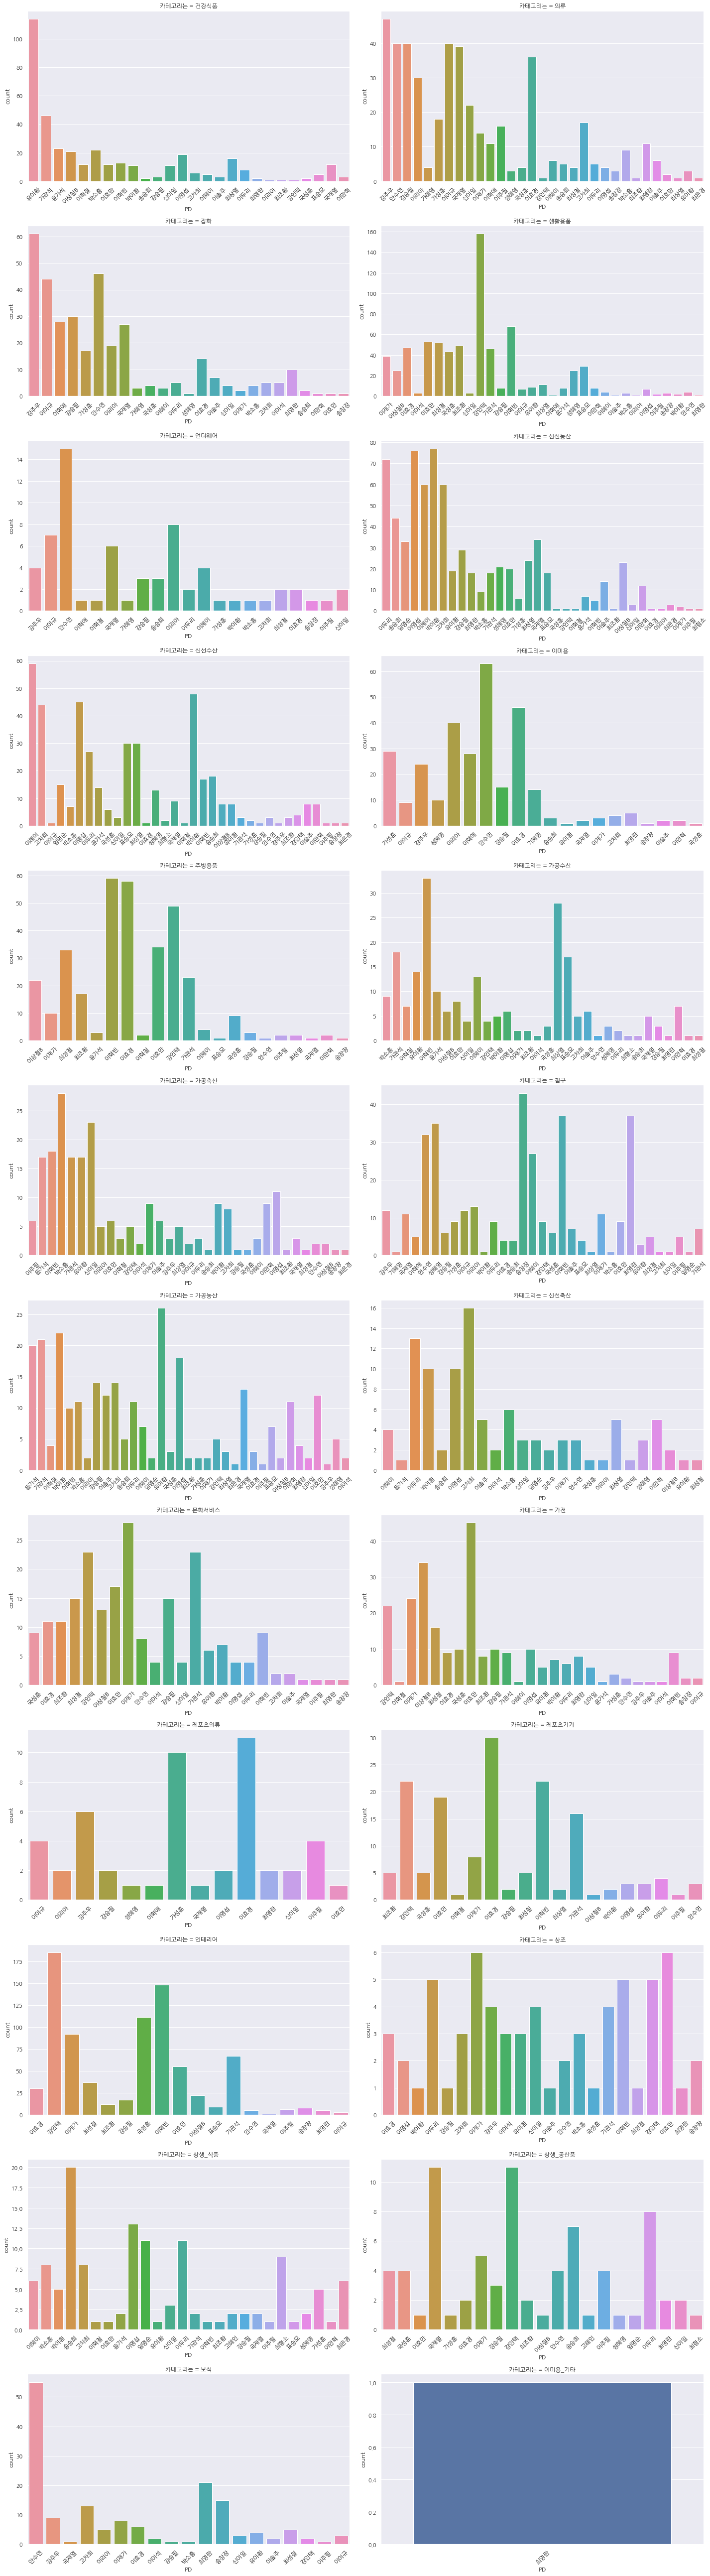

In [35]:
# 'PD' 열의 값을 기준으로 가장 빈번하게 나타나는 상위 5개의 값을 선택
#top_5_values = df_live['PD'].value_counts().nlargest(5).index.tolist()

# 선택된 상위 5개의 값을 가지고 있는 데이터프레임에서 '카테고리' 열과 'PD' 열을 사용하여 시각화
unique_A = pd.unique(df_live['카테고리'])
num_rows = len(unique_A) // 2 + len(unique_A) % 2
fig, ax = plt.subplots(num_rows, 2, figsize=(20, 6*num_rows))

for i, a in enumerate(unique_A):
    row, col = i // 2, i % 2
    mask = (df_live['카테고리'] == a)&(df_live['목표달성여부']==1) #& (df_live['PD'].isin(top_5_values)) 
    a_df = df_live.loc[mask]
    b_value_counts = a_df['PD'].value_counts()
    sns.countplot(x='PD', data=a_df, ax=ax[row, col])
    ax[row, col].set_title(f'카테고리는 = {a}')
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), size=12,rotation=45)

plt.tight_layout()
plt.show()

In [31]:
df = pd.crosstab(df_live["PD"], df_live['목표달성여부'])
chi, pval, dof, expected = chi2_contingency(df)
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
df
# PD는 목표달성여부와 관련성이 있음

chi-square test
chisq: 669.772
p: 0.000


목표달성여부,0,1
PD,,
가관석,385,320
가성훈,184,103
가혜영,22,23
강승필,315,209
강인택,421,508
강주우,305,175
고차희,355,207
고혜인,1,3
국성훈,563,224


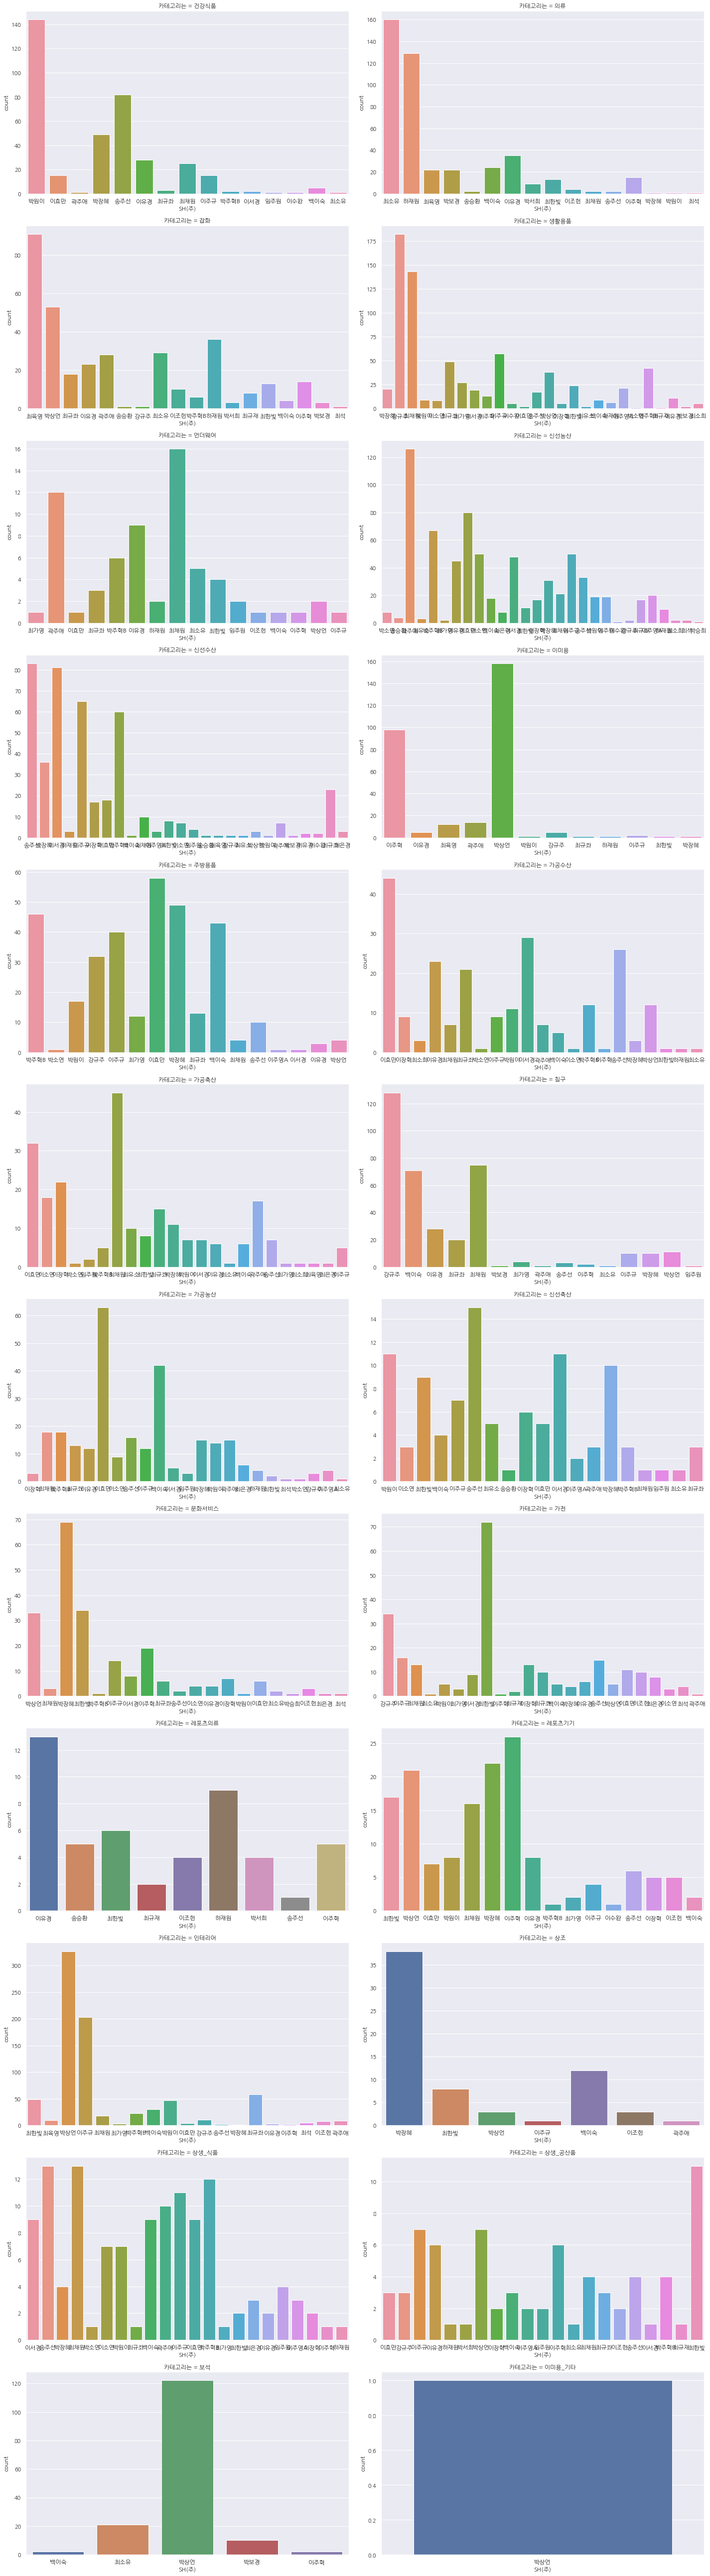

In [36]:
# 'SH(주)' 열의 값을 기준으로 가장 빈번하게 나타나는 상위 5개의 값을 선택
#top_5_values = df_live['SH(주)'].value_counts().nlargest(5).index.tolist()

# 선택된 상위 5개의 값을 가지고 있는 데이터프레임에서 '카테고리' 열과 'SH(주)' 열을 사용하여 시각화
unique_A = pd.unique(df_live['카테고리'])
num_rows = len(unique_A) // 2 + len(unique_A) % 2
fig, ax = plt.subplots(num_rows, 2, figsize=(20, 6*num_rows))

for i, a in enumerate(unique_A):
    row, col = i // 2, i % 2
    mask = (df_live['카테고리'] == a) & (df_live['목표달성여부']==1) #& (df_live['SH(주)'].isin(top_5_values)) 
    a_df = df_live.loc[mask]
    b_value_counts = a_df['SH(주)'].value_counts()
    sns.countplot(x='SH(주)', data=a_df, ax=ax[row, col])
    ax[row, col].set_title(f'카테고리는 = {a}')
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), size=12)

plt.tight_layout()
plt.show()

In [37]:
df = pd.crosstab(df_live["SH(주)"], df_live['목표달성여부'])
chi, pval, dof, expected = chi2_contingency(df)
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
df
# SH(주)는 목표달성여부와 관련성이 있음

chi-square test
chisq: 311.573
p: 0.000


목표달성여부,0,1
SH(주),,
강규주,672,402
곽주애,428,252
권기문,1,0
박보경,162,39
박상언,1208,800
박서희,34,17
박소연,25,14
박승희,0,2
박원이,600,303


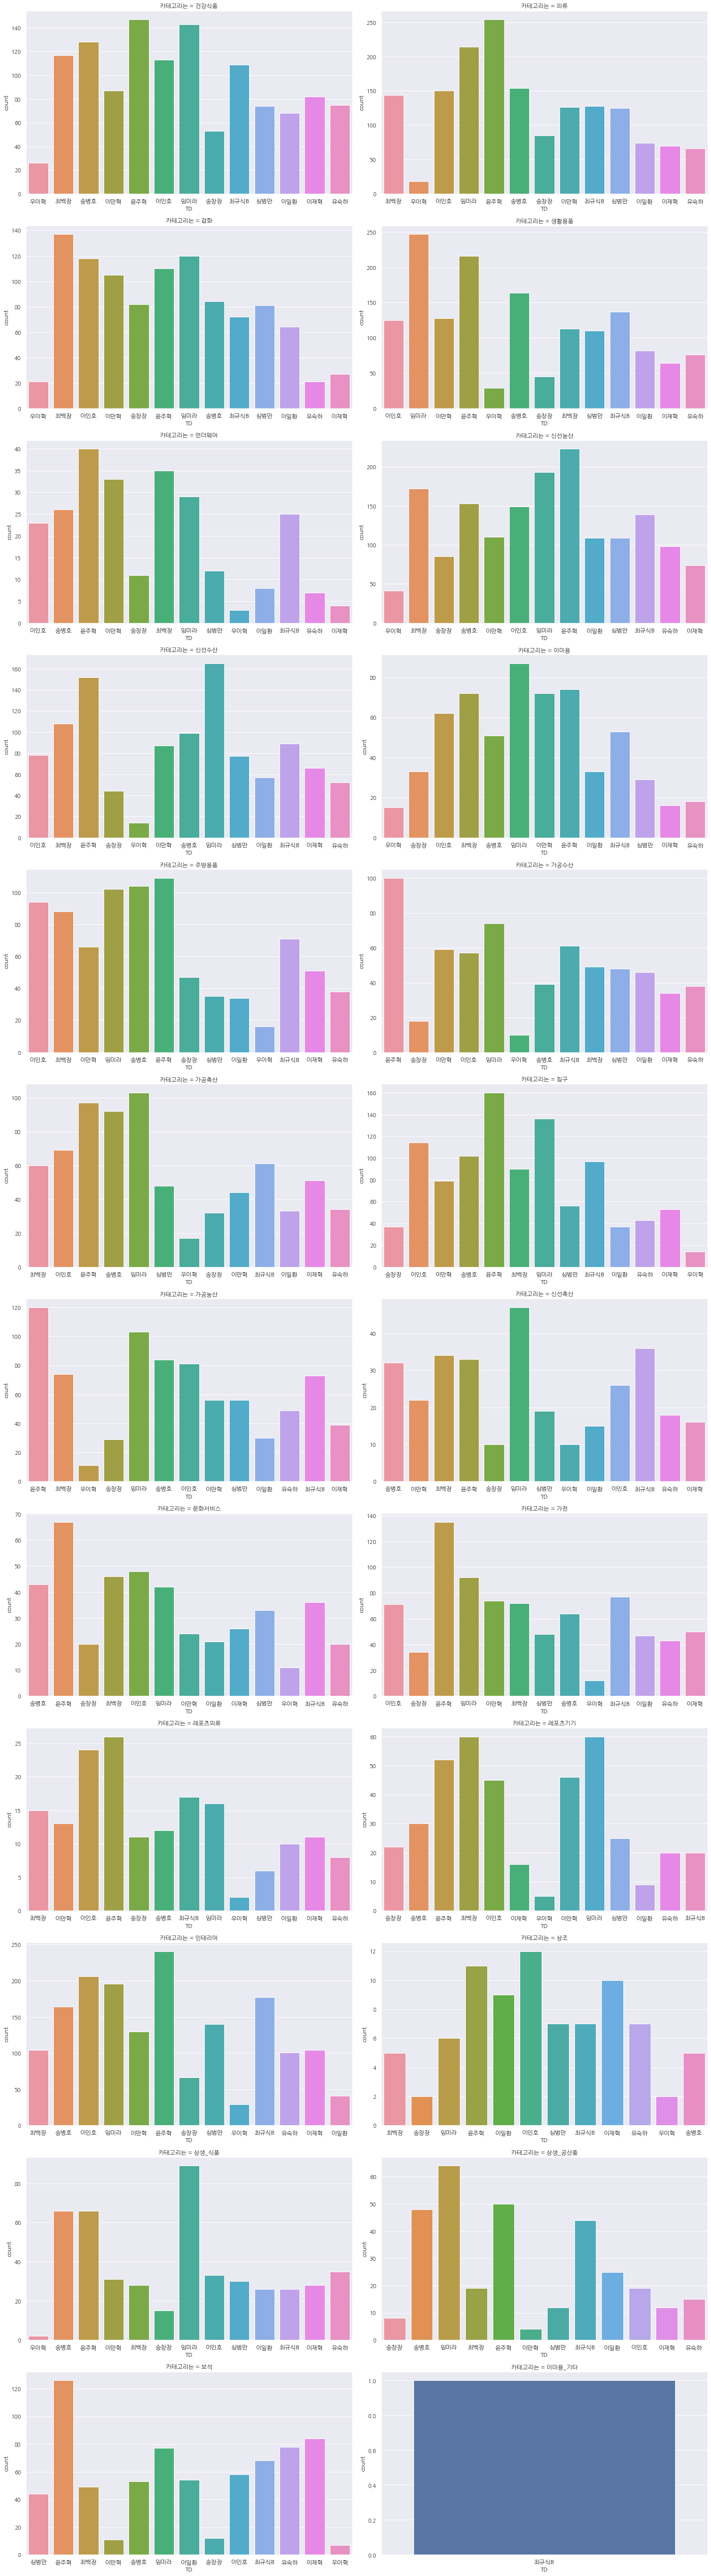

In [38]:
# 'TD' 열의 값을 기준으로 가장 빈번하게 나타나는 상위 5개의 값을 선택
#top_5_values = df_live['TD'].value_counts().nlargest(5).index.tolist()

# 선택된 상위 5개의 값을 가지고 있는 데이터프레임에서 '카테고리' 열과 'TD' 열을 사용하여 시각화
unique_A = pd.unique(df_live['카테고리'])
num_rows = len(unique_A) // 2 + len(unique_A) % 2
fig, ax = plt.subplots(num_rows, 2, figsize=(20, 6*num_rows))

for i, a in enumerate(unique_A):
    row, col = i // 2, i % 2
    mask = (df_live['카테고리'] == a) #& (df_live['TD'].isin(top_5_values))
    a_df = df_live.loc[mask]
    b_value_counts = a_df['TD'].value_counts()
    sns.countplot(x='TD', data=a_df, ax=ax[row, col])
    ax[row, col].set_title(f'카테고리는 = {a}')
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), size=12)

plt.tight_layout()
plt.show()

In [39]:
df = pd.crosstab(df_live["TD"], df_live['목표달성여부'])
chi, pval, dof, expected = chi2_contingency(df)
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
df
# TD는 목표달성여부와 관련성이 있음

chi-square test
chisq: 57.984
p: 0.000


목표달성여부,0,1
TD,,
송병호,1112,685
송창장,468,333
심범만,824,400
우이혁,185,130
유숙하,616,344
윤주혁,1670,939
이만혁,835,572
이인호,1072,703
이일환,616,316


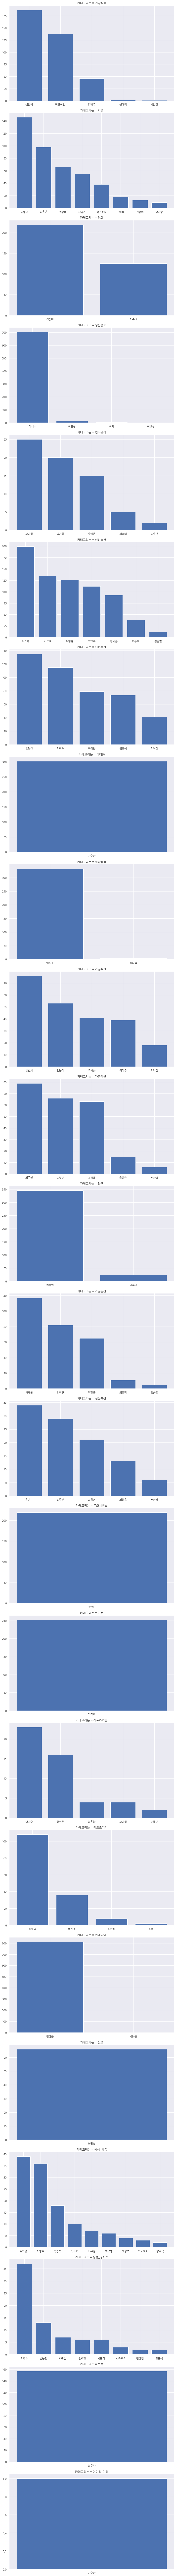

In [40]:
unique_A = pd.unique(df_live['카테고리'])

fig, axes = plt.subplots(len(unique_A), 1, figsize=(10, 6*len(unique_A)))

for i, a in enumerate(unique_A):
    mask = (df_live['카테고리'] == a) & (df_live['목표달성여부']==1)
    a_df = df_live.loc[mask]
    b_value_counts = a_df['MD'].value_counts()
    axes[i].bar(b_value_counts.index, b_value_counts.values)
    axes[i].set_title(f'카테고리는 = {a}')
    axes[i].set_xticklabels(b_value_counts.index)
    
plt.tight_layout()
plt.show()

In [41]:
df = pd.crosstab(df_live["MD"], df_live['목표달성여부'])
chi, pval, dof, expected = chi2_contingency(df)
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
df
# MD는 목표달성여부와 관련성이 있음

chi-square test
chisq: 566.216
p: 0.000


목표달성여부,0,1
MD,,
가길호,566,252
강동완,2,0
강병주,161,46
강승필,7,17
고이혁,139,47
권동인,415,148
남기중,116,52
노상필,3,0
박경은,4,1
